In [1]:
import numpy as np
import tensorflow as tf

In [2]:
images = np.random.rand(10,28,28,1)

In [3]:
images[0]

array([[[7.87403440e-01],
        [5.05877650e-02],
        [5.20343595e-01],
        [8.77897499e-01],
        [6.88678916e-01],
        [6.49665871e-01],
        [7.41214550e-01],
        [6.54096743e-01],
        [2.27476817e-01],
        [5.08099965e-01],
        [8.01101507e-01],
        [7.62759958e-01],
        [3.90590084e-01],
        [6.18363878e-01],
        [6.19160249e-01],
        [3.29236969e-01],
        [8.60580030e-01],
        [2.40328484e-01],
        [7.97620127e-01],
        [6.17359254e-01],
        [8.14496631e-01],
        [9.45271603e-01],
        [2.54310457e-01],
        [6.31685149e-01],
        [7.02800406e-01],
        [6.07510111e-02],
        [3.89612455e-01],
        [6.41999523e-01]],

       [[7.29571220e-01],
        [7.16178202e-01],
        [4.13521761e-01],
        [2.95729307e-02],
        [6.33247999e-01],
        [8.04582104e-01],
        [8.84498134e-01],
        [3.01382457e-01],
        [9.25370841e-01],
        [5.28909471e-01],
        [1

In [4]:
windows = tf.reshape(images, (10, 14, 14, 2, 2, 1))
print(windows.shape)

(10, 14, 14, 2, 2, 1)


2024-02-27 13:33:37.556446: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-27 13:33:37.556466: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-27 13:33:37.556470: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-27 13:33:37.556749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-27 13:33:37.556767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
windows = tf.transpose(windows, (0, 1, 2, 3, 4, 5))
print(windows.shape)

(10, 14, 14, 2, 2, 1)


In [6]:
windows = tf.reshape(windows, (10 * 196, 4, 1))
print(windows.shape)  

(1960, 4, 1)


In [7]:
windows[0]

<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.78740344],
       [0.05058776],
       [0.5203436 ],
       [0.8778975 ]])>

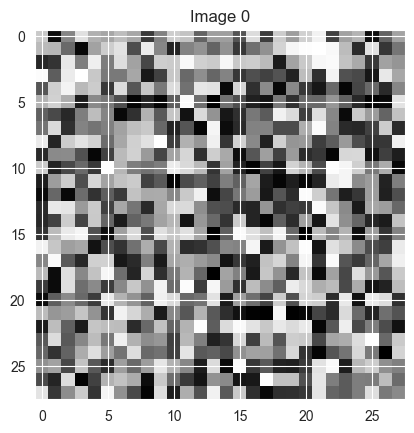

In [8]:
import matplotlib.pyplot as plt

for i in range(1):
  plt.imshow(images[i, :, :, 0], cmap='gray')  # Assuming grayscale images
  plt.title(f'Image {i}')
  plt.show()


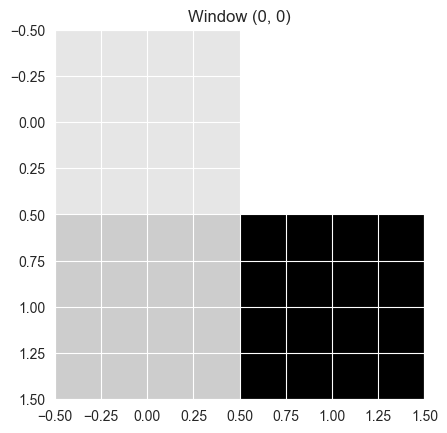

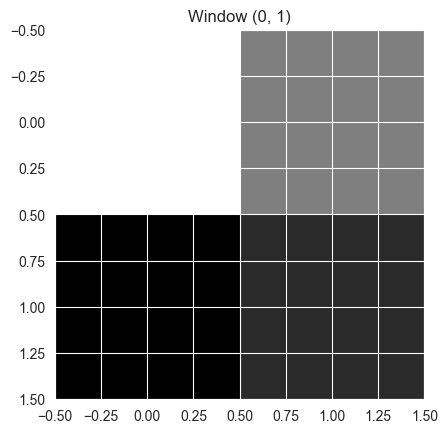

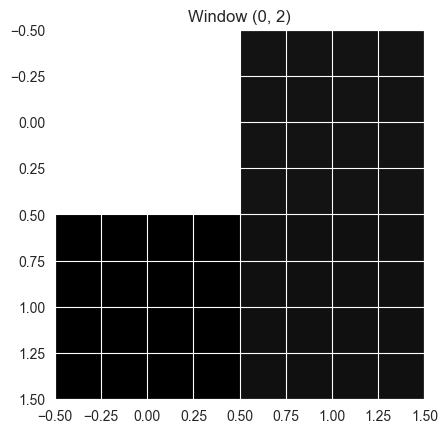

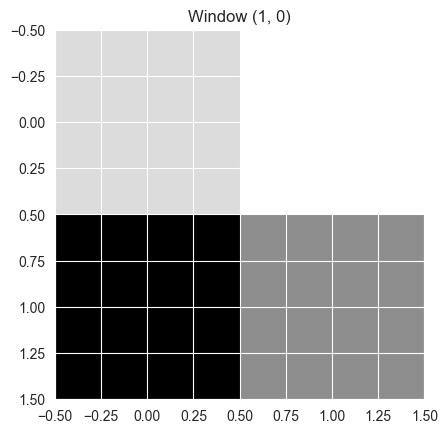

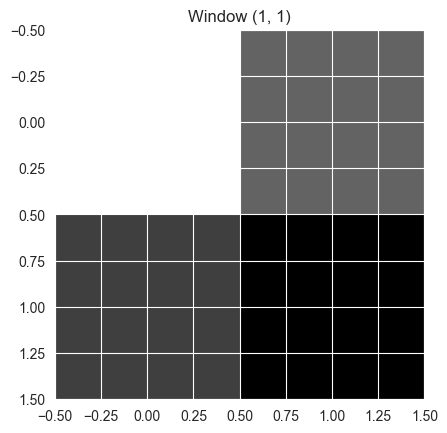

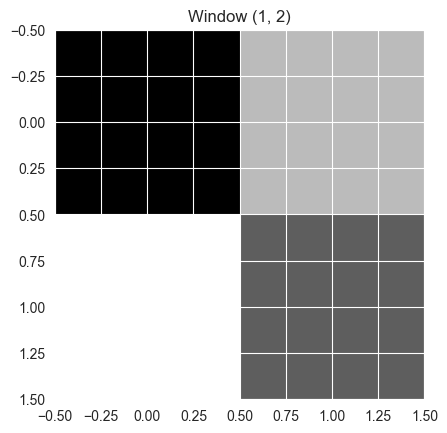

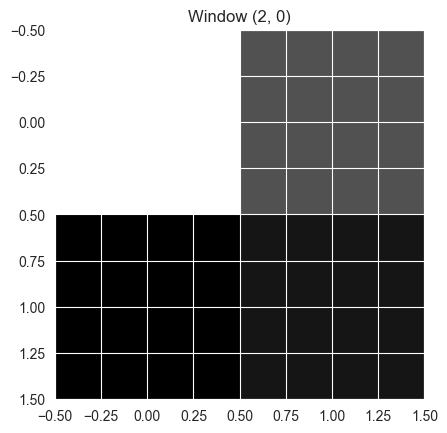

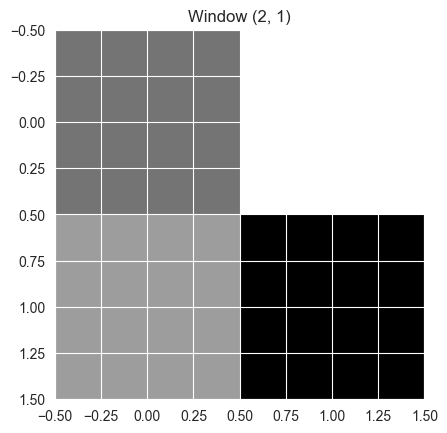

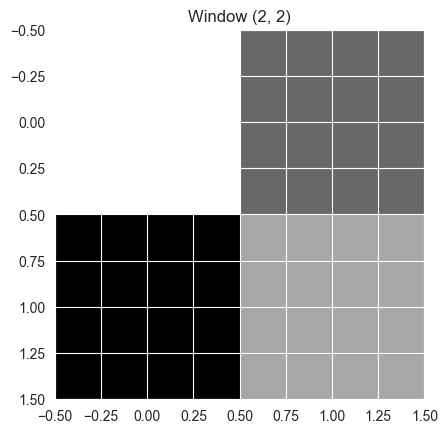

In [9]:
# Pick a specific image index
image_index = 0
images = np.random.rand(10,28,28,1)

# Extract windows from the selected image
windows = tf.reshape(images[image_index], (14, 14, 2, 2, 1))
windows = tf.transpose(windows, (0, 1, 3, 2, 4))

# Plot a selection of windows
for i in range(3):  # Plot 3 sample windows
  for j in range(3):
     plt.imshow(windows[i, j, :, :, 0], cmap='gray')
     plt.title(f'Window ({i}, {j})')
     plt.show()


In [10]:
import tensorflow as tf
import numpy as np

# Simulate a single 4x4 image (single channel)
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])
image = image.reshape((4, 4, 1))  # Add sample and channel dimensions
print(image.shape)
print(image)
# Corrected window extraction logic

def extract_windows2(image):
    num_samples, height, width, num_channels = image.shape  # Get image dimensions

    # Reshape to extract all 2x2 windows
    windows = tf.reshape(image, (num_samples, height // 2, width // 2, 2, 2, num_channels))
    windows = tf.transpose(windows, (0, 1, 3, 2, 4, 5)) 

    # Batching reshape
    windows = tf.reshape(windows, (num_samples * (height // 2) * (width // 2), 4, num_channels))

    return windows

def extract_windows(image):
    height, width, num_channels = image.shape  # Get image dimensions

    # Reshape to extract all 2x2 windows
    windows = tf.reshape(image, (height // 2, width // 2, 2, 2, num_channels))
    windows = tf.transpose(windows, (0, 2, 1, 3, 4)) 

    # Batching reshape
    windows = tf.reshape(windows, ((height // 2) * (width // 2), 4, num_channels))

    return windows
# Extract the windows
result = extract_windows(image)

# Print the extracted windows
for i, window in enumerate(result):
    print(f"Window {i+1}:\n", window)


(4, 4, 1)
[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]

 [[13]
  [14]
  [15]
  [16]]]
Window 1:
 tf.Tensor(
[[1]
 [2]
 [5]
 [6]], shape=(4, 1), dtype=int64)
Window 2:
 tf.Tensor(
[[3]
 [4]
 [7]
 [8]], shape=(4, 1), dtype=int64)
Window 3:
 tf.Tensor(
[[ 9]
 [10]
 [13]
 [14]], shape=(4, 1), dtype=int64)
Window 4:
 tf.Tensor(
[[11]
 [12]
 [15]
 [16]], shape=(4, 1), dtype=int64)


In [11]:
images = tf.random.normal(shape=(100, 28, 28, 1)) 
patches = tf.image.extract_patches(
    images=images,
    sizes=[1, 2, 2, 1],  # Patch size of 4x4
    strides=[1, 2, 2, 1],  # Stride of 2
    rates=[1, 1, 1, 1],  # No dilation
    padding='VALID'
)
first_image_first_patch = patches[0, 0, 0, :] 


In [12]:
first_image_first_patch
print(patches.shape)

(100, 14, 14, 4)


In [13]:
for batch_idx in range(patches.shape[0]):
    for patch_y in range(patches.shape[1]):
        for patch_x in range(patches.shape[2]):
            patch = patches[batch_idx, patch_y, patch_x, :]
            print(patch.shape)

(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)


KeyboardInterrupt: 

In [ ]:
batch_size = 100

for i in range(0, 100, batch_size):
    batch_patches = patches[i:i + batch_size]
    batch_patches = tf.reshape(batch_patches, [-1, 4])
    
    quantized_patches = tf.stack([print(patch.shape) for patch in tf.unstack(batch_patches) ])
    #print(batch_patches.shape)

Counter({0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50})


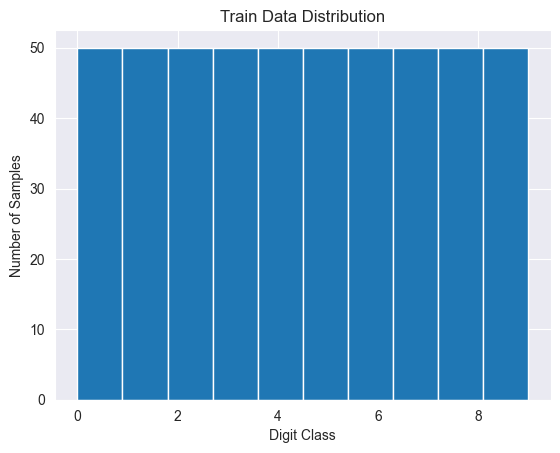

Counter({0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3})


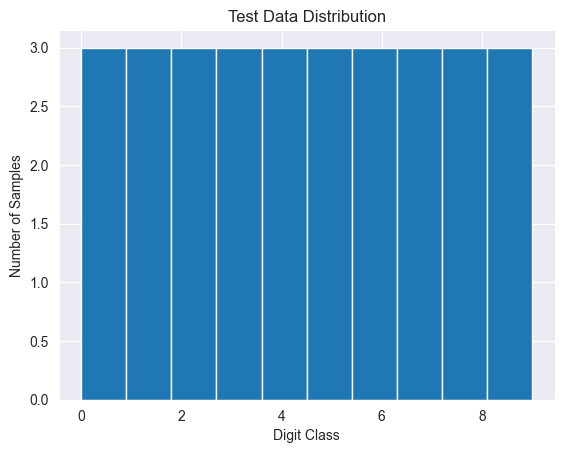

In [14]:
import pennylane as qml
from pennylane import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import collections
import tensorflow as tf
from functools import partial

def load_dataset(train_size, test_size):
    mnist_dataset = keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

    # --- Train Set ---
    train_idx_by_class = [np.where(train_labels == i)[0] for i in range(10)]  
    train_idx_selected = [
        np.random.choice(idxs, min(len(idxs), train_size // 10), replace=False)  # Adjusted for train_size
        for idxs in train_idx_by_class
    ]
    train_idx_selected = np.concatenate(train_idx_selected) 

    train_images = train_images[train_idx_selected]
    train_labels = train_labels[train_idx_selected]

    # --- Test Set --- (Apply the same logic)
    test_idx_by_class = [np.where(test_labels == i)[0] for i in range(10)] 
    test_idx_selected = [
        np.random.choice(idxs, min(len(idxs), test_size // 10), replace=False)  # Adjusted for test_size
        for idxs in test_idx_by_class
    ]
    test_idx_selected = np.concatenate(test_idx_selected) 

    test_images = test_images[test_idx_selected]
    test_labels = test_labels[test_idx_selected]

    # Normalize pixel values within 0 and 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Add extra dimension for convolution channels
    train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
    test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)
    
    #new_height = 14  # 28 / 2
    #new_width = 14  # 28 / 2 
    #train_images = tf.image.resize(train_images, (new_height, new_width))
    #test_images = tf.image.resize(test_images, (new_height, new_width))
    
    return train_images, train_labels, test_images, test_labels

n_train = 500
n_test = 30
train_images, train_labels, test_images, test_labels = load_dataset(n_train, n_test)

label_counts = collections.Counter(train_labels)
print(label_counts)

plt.hist(train_labels)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()
label_counts = collections.Counter(test_labels)
print(label_counts)

plt.hist(test_labels)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [15]:
import pennylane as qml
from functools import partial
num_qubits = 4

dev = qml.device('lightning.qubit', wires=4)

@partial(qml.batch_input, argnum = 1)
@qml.qnode(dev,interface="tf", diff_method="parameter-shift")
def circuit(inputs, weights):
    # Encoding of 4 classical input values
    for j in range(num_qubits):
        qml.RY(np.pi * inputs[j], wires=j)
    
    qml.RZ(weights[0], wires=[3])
    qml.Hadamard(wires=[1])
    qml.S(wires=[1])
    qml.RX(weights[1], wires=[0])
    qml.RZ(weights[2], wires=[0])
    qml.RY(weights[3], wires=[2])

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(num_qubits)]

In [16]:
def extract_all_patches(images):
    patches = tf.image.extract_patches(
        images=images,
        sizes=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )
    
    return patches

train_images_patches = extract_all_patches(train_images)

print(f"Train images shape is {train_images.shape}")
print(f"Train image patches shape is {train_images_patches.shape}")
print(f"Train label image shape is {train_labels.shape}")

test_images_patches = extract_all_patches(test_images)
print(f"Test images shape is {test_images.shape}")
print(f"Test image patches shape is {test_images_patches.shape}")
print(f"Test label image shape is {test_labels.shape}")

Train images shape is (500, 28, 28, 1)
Train image patches shape is (500, 14, 14, 4)
Train label image shape is (500,)
Test images shape is (30, 28, 28, 1)
Test image patches shape is (30, 14, 14, 4)
Test label image shape is (30,)


In [17]:
test_images_patches = tf.reshape(test_images_patches, [-1,4])
test_images_patches = tf.transpose(test_images_patches)
circuit(test_images_patches, [1,2,3,4,5])

KeyboardInterrupt: 